In [54]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [55]:
import yfinance as yf


In [56]:
def save_stock_data(ticker, save_file_name=None):
  try:
    msft = yf.Ticker(ticker)
    raw_data = msft.history(period="max")
    if save_file_name==None:
      raw_data.to_csv(ticker + "_past_data.csv")
      return 0
    else:
      raw_data.to_csv(save_file_name)
      return 0
  except:
    return 1

In [57]:
save_stock_data("TSLA")

0

# Importing Libraries


In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
%matplotlib inline

# Data Cleaning



In [59]:
df = pd.read_csv('TSLA_past_data.csv')

In [60]:
df.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29,3.800,5.000,3.508,4.778,93831500,0,0.0
1,2010-06-30,5.158,6.084,4.660,4.766,85935500,0,0.0
2,2010-07-01,5.000,5.184,4.054,4.392,41094000,0,0.0
3,2010-07-02,4.600,4.620,3.742,3.840,25699000,0,0.0
4,2010-07-06,4.000,4.000,3.166,3.222,34334500,0,0.0


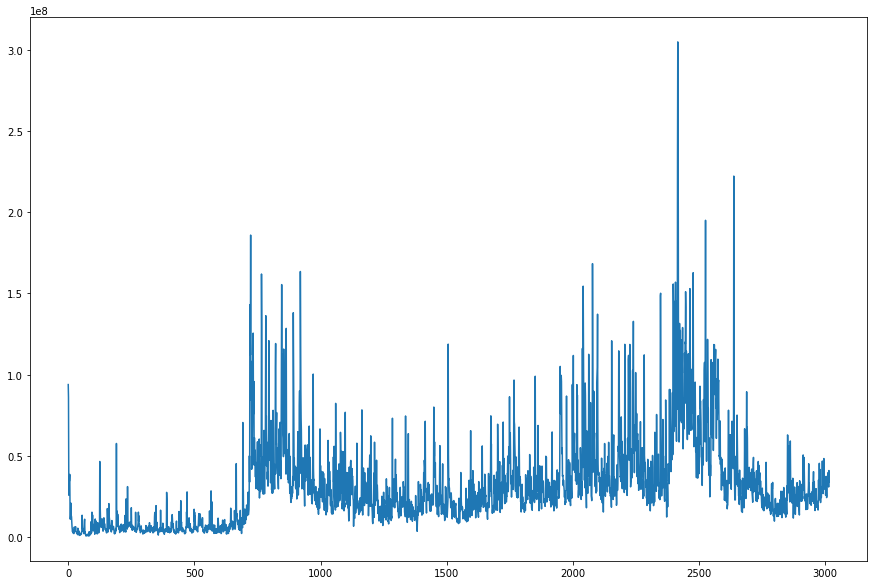

In [61]:
plt.figure(figsize=(15,10))
df['Volume'].plot()

In [62]:
df['Volume'].value_counts()

16098000    2
23475000    2
4782000     2
8572500     2
3307500     2
           ..
19111000    1
13650000    1
15416500    1
16227500    1
33702500    1
Name: Volume, Length: 2986, dtype: int64

In [63]:
df['Dividends'].value_counts()

0    3017
Name: Dividends, dtype: int64

In [64]:
df['Stock Splits'].value_counts()

0.0    3016
5.0       1
Name: Stock Splits, dtype: int64

In [65]:
# dropping 'Dividends' and 'Stock Splits' attribute as they have constant value of 0's which are of no use
df.drop(['Dividends', 'Stock Splits'], axis=1, inplace=True)

In [66]:
df

,Date,Open,High,Low,Close,Volume
0,2010-06-29,3.800000,5.000000,3.508000,4.778000,93831500
1,2010-06-30,5.158000,6.084000,4.660000,4.766000,85935500
2,2010-07-01,5.000000,5.184000,4.054000,4.392000,41094000
3,2010-07-02,4.600000,4.620000,3.742000,3.840000,25699000
4,2010-07-06,4.000000,4.000000,3.166000,3.222000,34334500
...,...,...,...,...,...,...
3012,2022-06-15,662.750000,706.989990,654.450012,699.000000,39710600
3013,2022-06-16,668.210022,675.500000,626.080017,639.299988,35796900
3014,2022-06-17,640.299988,662.909973,639.590027,650.280029,30810900
3015,2022-06-21,673.809998,730.729980,673.000000,711.109985,40931000


In [67]:
df.isna().sum() # no null values

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3017 entries, 0 to 3016
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3017 non-null   object 
 1   Open    3017 non-null   float64
 2   High    3017 non-null   float64
 3   Low     3017 non-null   float64
 4   Close   3017 non-null   float64
 5   Volume  3017 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 141.5+ KB


In [69]:
df.describe()

,Open,High,Low,Close,Volume
count,3017.000000,3017.000000,3017.000000,3017.000000,3.017000e+03
mean,153.215347,156.679402,149.456031,153.162457,3.126365e+07
std,268.297004,274.596603,261.246807,268.017387,2.772084e+07
min,3.228000,3.326000,2.996000,3.160000,5.925000e+05
25%,21.350000,22.150000,20.900000,21.809999,1.343800e+07
50%,47.203999,48.000000,46.326000,47.360001,2.513500e+07
75%,69.360001,70.309998,68.181999,69.417999,3.959250e+07
max,1234.410034,1243.489990,1217.000000,1229.910034,3.046940e+08


In [70]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [72]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [87]:
df.corr()

,Open,High,Low,Close,Volume,Year,Month,Day
Open,1.000000,0.999725,0.999586,0.999197,0.076287,0.686799,-0.038000,-0.010149
High,0.999725,1.000000,0.999584,0.999632,0.079896,0.686949,-0.038583,-0.009203
Low,0.999586,0.999584,1.000000,0.999669,0.072626,0.686994,-0.036716,-0.008941
Close,0.999197,0.999632,0.999669,1.000000,0.077082,0.686999,-0.036979,-0.008543
Volume,0.076287,0.079896,0.072626,0.077082,1.000000,0.417759,-0.073184,-0.042060
Year,0.686799,0.686949,0.686994,0.686999,0.417759,1.000000,-0.123057,-0.007777
Month,-0.038000,-0.038583,-0.036716,-0.036979,-0.073184,-0.123057,1.000000,0.001170
Day,-0.010149,-0.009203,-0.008941,-0.008543,-0.042060,-0.007777,0.001170,1.000000


In [73]:
df.head()

,Date,Open,High,Low,Close,Volume,Year,Month,Day
0,2010-06-29,3.800,5.000,3.508,4.778,93831500,2010,6,29
1,2010-06-30,5.158,6.084,4.660,4.766,85935500,2010,6,30
2,2010-07-01,5.000,5.184,4.054,4.392,41094000,2010,7,1
3,2010-07-02,4.600,4.620,3.742,3.840,25699000,2010,7,2
4,2010-07-06,4.000,4.000,3.166,3.222,34334500,2010,7,6


Text(0.5, 1.0, 'HEATMAP')

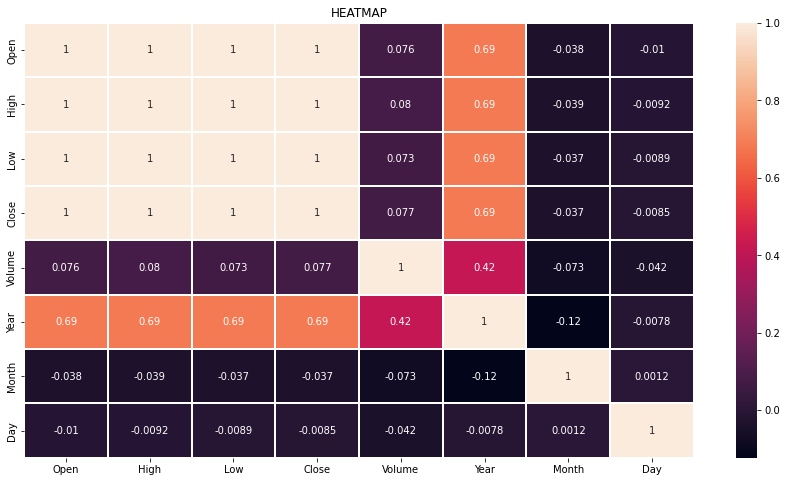

In [82]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True, linewidth=1)
plt.title('HEATMAP')